In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
!pip install pandas-profiling
!pip install dtale

In [20]:
Travel1 = pd.read_csv('Travel1.csv')
Travel1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
recordscolumns = Travel1.shape
print("Number of Records and Columns in Travel1:")
print(recordscolumns)


Number of Records and Columns in Travel1:
(4891, 20)


In [4]:
Travel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4891 non-null   int64  
 1   ProdTaken                 4891 non-null   int64  
 2   Age                       4667 non-null   float64
 3   TypeofContact             4866 non-null   object 
 4   CityTier                  4891 non-null   int64  
 5   DurationOfPitch           4639 non-null   float64
 6   Occupation                4891 non-null   object 
 7   Gender                    4891 non-null   object 
 8   NumberOfPersonVisiting    4891 non-null   int64  
 9   NumberOfFollowups         4846 non-null   float64
 10  ProductPitched            4891 non-null   object 
 11  PreferredPropertyStar     4865 non-null   float64
 12  MaritalStatus             4891 non-null   object 
 13  NumberOfTrips             4751 non-null   float64
 14  Passport

In [5]:
Travel1.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4891.000000,4891.000000,4667.000000,4891.000000,4639.000000,4891.000000,4846.000000,4865.000000,4751.000000,4891.000000,4891.000000,4891.000000,4825.000000,4659.000000
mean,202442.049274,0.188101,37.689951,1.653854,15.495581,2.904519,3.708419,3.580884,3.236371,0.290738,3.078307,0.620119,1.186736,23731.619017
std,1411.971048,0.390832,9.988209,0.916445,8.521030,0.725015,1.002267,0.797872,1.849811,0.454149,1.365437,0.485407,0.857939,7646.401148
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201219.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202442.000000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22351.000000
75%,203664.500000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25583.500000
max,204887.000000,1.000000,256.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,300050.000000


In [6]:
Travel1.describe(include = [object])

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4866,4891,4891,4891,4891,4891
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3446,2371,2918,1843,2341,1843


In [7]:
Travel1.describe(include = 'all')

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4891.000000,4891.000000,4667.000000,4866,4891.000000,4639.000000,4891,4891,4891.000000,4846.000000,4891,4865.000000,4891,4751.000000,4891.000000,4891.000000,4891.000000,4825.000000,4891,4659.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3446,NaN,NaN,2371,2918,NaN,NaN,1843,NaN,2341,NaN,NaN,NaN,NaN,NaN,1843,NaN
mean,202442.049274,0.188101,37.689951,NaN,1.653854,15.495581,NaN,NaN,2.904519,3.708419,NaN,3.580884,NaN,3.236371,0.290738,3.078307,0.620119,1.186736,NaN,23731.619017
std,1411.971048,0.390832,9.988209,NaN,0.916445,8.521030,NaN,NaN,0.725015,1.002267,NaN,0.797872,NaN,1.849811,0.454149,1.365437,0.485407,0.857939,NaN,7646.401148
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201219.500000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202442.000000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22351.000000
75%,203664.500000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25583.500000


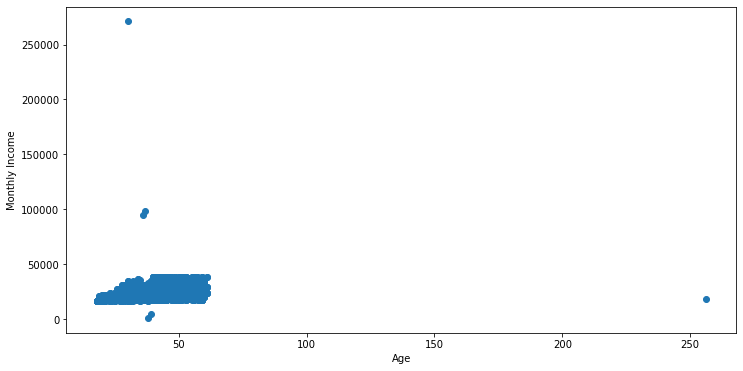

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Travel1['Age'], Travel1['MonthlyIncome'])
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
plt.show()

In [9]:
mean1 = Travel1['Age'].mean()
Travel1["Age"] = np.where(Travel1["Age"] >100, mean1,Travel1['Age'])
mean2 = Travel1['MonthlyIncome'].mean()
Travel1["MonthlyIncome"] = np.where(Travel1["MonthlyIncome"] >150000, mean2,Travel1['MonthlyIncome'])
Travel1.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4891.000000,4891.000000,4667.000000,4891.000000,4639.000000,4891.000000,4846.000000,4865.000000,4751.000000,4891.000000,4891.000000,4891.000000,4825.000000,4659.000000
mean,202442.049274,0.188101,37.618680,1.653854,15.495581,2.904519,3.708419,3.580884,3.236371,0.290738,3.078307,0.620119,1.186736,23619.224348
std,1411.971048,0.390832,9.313681,0.916445,8.521030,0.725015,1.002267,0.797872,1.849811,0.454149,1.365437,0.485407,0.857939,5378.729670
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201219.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202442.000000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22351.000000
75%,203664.500000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25566.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [10]:
Travel1.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         224
TypeofContact                25
CityTier                      0
DurationOfPitch             252
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               232
dtype: int64

In [11]:
Travel1[['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfTrips' , 'NumberOfChildrenVisiting' , 'MonthlyIncome']] = Travel1[['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfTrips' , 'NumberOfChildrenVisiting' , 'MonthlyIncome']].fillna(Travel1[['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfTrips' , 'NumberOfChildrenVisiting' , 'MonthlyIncome']].median())
Travel1['TypeofContact'] = Travel1['TypeofContact'].fillna(Travel1['TypeofContact'].mode()[0])
Travel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4891 non-null   int64  
 1   ProdTaken                 4891 non-null   int64  
 2   Age                       4891 non-null   float64
 3   TypeofContact             4891 non-null   object 
 4   CityTier                  4891 non-null   int64  
 5   DurationOfPitch           4891 non-null   float64
 6   Occupation                4891 non-null   object 
 7   Gender                    4891 non-null   object 
 8   NumberOfPersonVisiting    4891 non-null   int64  
 9   NumberOfFollowups         4891 non-null   float64
 10  ProductPitched            4891 non-null   object 
 11  PreferredPropertyStar     4891 non-null   float64
 12  MaritalStatus             4891 non-null   object 
 13  NumberOfTrips             4891 non-null   float64
 14  Passport

In [12]:
Travel1['Gender'] = Travel1['Gender'].str.replace('Fe Male' , 'Female')

Travel1.head(60)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.000000
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.000000
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.000000
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.000000
4,200004,0,36.000000,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.000000
5,200005,0,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.000000
6,200006,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.000000
7,200007,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.000000
8,200008,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.000000
9,200008,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.000000


In [13]:
Travel1.drop("CustomerID", axis=1, inplace=True)
Travel1.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
Travel1.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143371,0.087043,0.076210,0.009990,0.111557,0.098774,0.019730,0.260982,0.051333,-0.011328,0.008300,-0.126382
Age,-0.143371,1.000000,-0.012536,-0.006555,0.018215,0.001824,-0.015715,0.174646,0.032661,0.017182,0.047236,0.008846,0.461292
CityTier,0.087043,-0.012536,1.000000,0.019085,-0.001123,0.024347,-0.008342,-0.028668,0.002073,-0.042233,0.004073,0.001015,0.051816
DurationOfPitch,0.076210,-0.006555,0.019085,1.000000,0.072488,0.015437,-0.005867,0.013347,0.033196,-0.002423,-0.002690,0.037336,0.002954
NumberOfPersonVisiting,0.009990,0.018215,-0.001123,0.072488,1.000000,0.324752,0.030735,0.189977,0.011661,-0.019713,0.010805,0.606554,0.198386
NumberOfFollowups,0.111557,0.001824,0.024347,0.015437,0.324752,1.000000,-0.026890,0.135222,0.004427,0.004299,0.011916,0.281558,0.176039
PreferredPropertyStar,0.098774,-0.015715,-0.008342,-0.005867,0.030735,-0.026890,1.000000,0.010011,0.001342,-0.024113,0.013505,0.031734,-0.000659
NumberOfTrips,0.019730,0.174646,-0.028668,0.013347,0.189977,0.135222,0.010011,1.000000,0.012964,-0.004676,-0.012566,0.161441,0.114805
Passport,0.260982,0.032661,0.002073,0.033196,0.011661,0.004427,0.001342,0.012964,1.000000,0.002852,-0.022086,0.020626,0.003485
PitchSatisfactionScore,0.051333,0.017182,-0.042233,-0.002423,-0.019713,0.004299,-0.024113,-0.004676,0.002852,1.000000,0.068957,0.000078,0.028956


<AxesSubplot:>

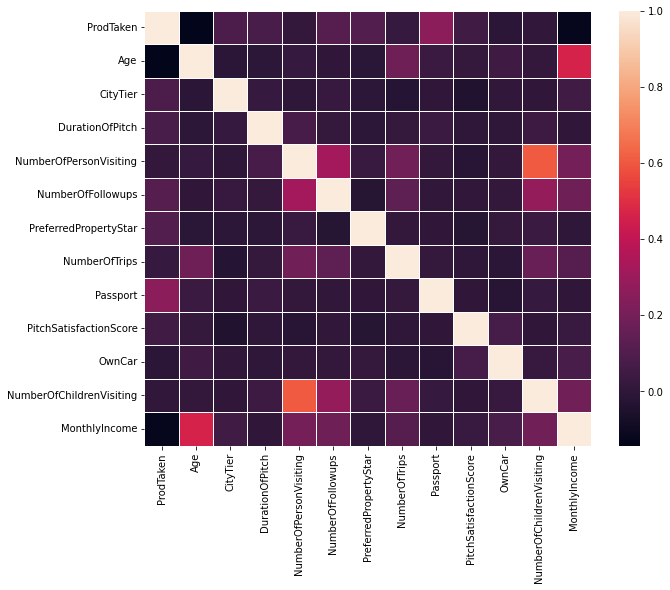

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(Travel1.corr() , linewidths=.5)

In [16]:
print(Travel1.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4886    False
4887    False
4888    False
4889    False
4890    False
Length: 4891, dtype: bool


In [17]:
Travel1.duplicated().sum()

143

In [18]:
Travel1[Travel1.duplicated()].head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
9,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
116,0,24.0,Self Enquiry,1,24.0,Salaried,Male,2,3.0,Basic,3.0,Divorced,1.0,0,4,1,0.0,Executive,17774.0
117,0,34.0,Self Enquiry,1,13.0,Salaried,Female,2,4.0,Deluxe,4.0,Married,7.0,0,3,0,1.0,Manager,19505.0
1517,0,36.0,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,22351.0
1521,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0


In [19]:
Travel1.drop_duplicates()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4887,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4888,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4889,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [32]:
qwerty= Travel1['Gender'].value_counts()
qwerty

Male       2918
Female     1818
Fe Male     155
Name: Gender, dtype: int64

In [33]:
qwerty.index.values

array(['Male', 'Female', 'Fe Male'], dtype=object)

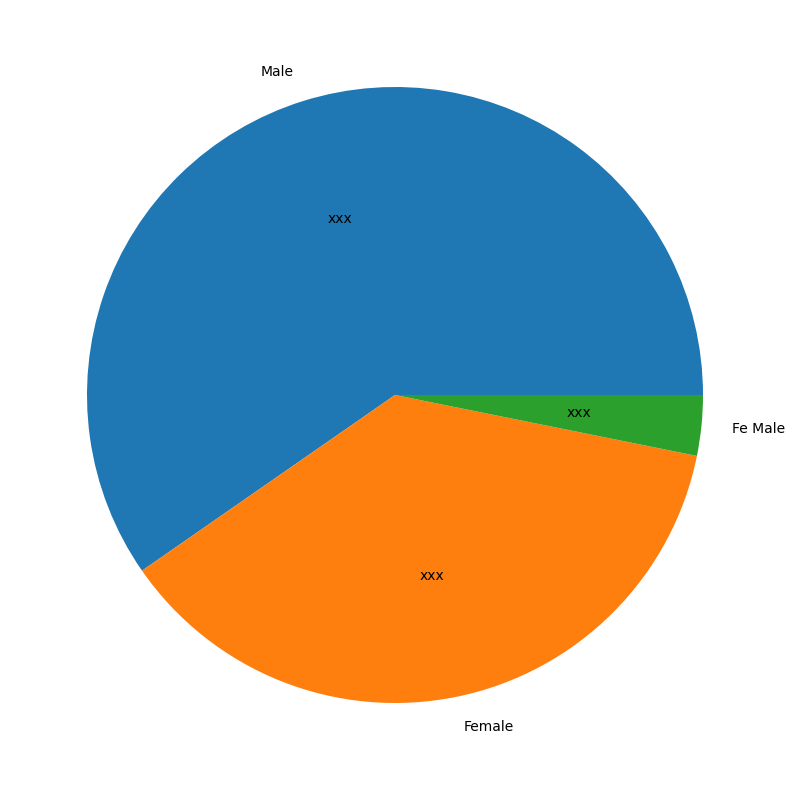

In [54]:
plt.figure(figsize=(10, 10))
plt.pie(qwerty, labels = qwerty.index.values, autopct= 'xxx')
plt.show()

<AxesSubplot:>

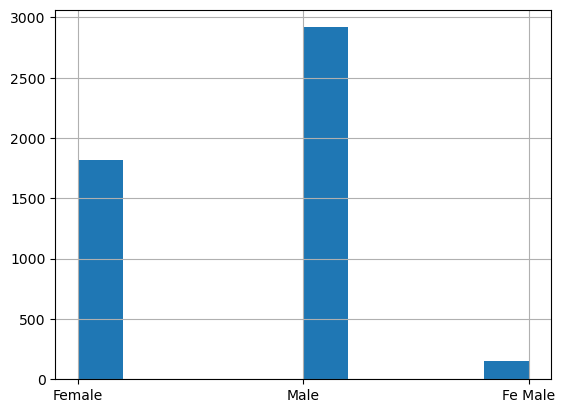

In [28]:
Travel1.Gender.hist()

In [22]:
Travel1.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [23]:
TypeofContact = Travel1['TypeofContact'].unique()
Occupation = Travel1['Occupation'].unique()
Gender = Travel1['Gender'].unique()
ProductPitched = Travel1['ProductPitched'].unique()
MaritalStatus = Travel1['MaritalStatus'].unique()
Designation = Travel1['Designation'].unique()

print(TypeofContact)
print(Occupation)
print(Gender)
print(ProductPitched)
print(MaritalStatus)
print(Designation)

['Self Enquiry' 'Company Invited']
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
['Female' 'Male']
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
['Single' 'Divorced' 'Married' 'Unmarried']
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


In [22]:
Travel1['TypeofContact'].nunique()

2

In [24]:
label_encoder = LabelEncoder()
Travel1["TypeofContact"] = label_encoder.fit_transform(Travel1["TypeofContact"])
Travel1["Occupation"] = label_encoder.fit_transform(Travel1["Occupation"])
Travel1["Gender"] = label_encoder.fit_transform(Travel1["Gender"])
Travel1["ProductPitched"] = label_encoder.fit_transform(Travel1["ProductPitched"])
Travel1["MaritalStatus"] = label_encoder.fit_transform(Travel1["MaritalStatus"])
Travel1["Designation"] = label_encoder.fit_transform(Travel1["Designation"])

Travel1.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,0,49.0,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,1,37.0,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,0,33.0,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,0,36.0,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0


In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Travel1, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
import dtale
dtale.show(pd.read_csv('Travel1.csv'))

C:\Users\RonWeb\anaconda3\lib\site-packages\dtale\views.py:725: FutureWarning:

['TypeofContact'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.

